In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 99

In [2]:
col = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv("imports-85.data", names=col)
cars.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [3]:
# Select only the columns with continuous values from - https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]

In [4]:
numeric_cars.head(3)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500


In [5]:
numeric_cars= numeric_cars.replace("?",np.nan)
numeric_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
numeric_cars =numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [7]:
## Because `price` is the column we want to predict, let's remove any rows with missing `price` values.
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [8]:
numeric_cars =numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [9]:
# Normalize all columnns to range from 0 to 1 except the target column.
price_col= numeric_cars['price']
numeric_cars = (numeric_cars-numeric_cars.min())/(numeric_cars.max() -numeric_cars.min())
numeric_cars['price']=price_col

In [10]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


#### Univariate Model

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[[train_col]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val

# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

In [12]:
def knn_train_test_multi_columns(train_columns,target_column,n_splits,df):
    np.random.seed(1)
        
    #We shuffle the dataframe
    new_df = df.iloc[np.random.permutation(len(df))]
    
    # Split dataframe into training and testing set
    train_set = new_df.iloc[0:int(len(new_df) * .5)]
    test_set = new_df.iloc[int(len(new_df) *.5):]
    
    knn = KNeighborsRegressor()
    knn.fit(train_set[train_columns],train_set[[target_column]])
    prediction = knn.predict(test_set[train_columns])
    mse = mean_squared_error(test_set[[target_column]],prediction)
    rmse = np.sqrt(mse)
    return rmse

for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val

rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

Using the following K values(1,3,5,7 and 9) train and test a univariate model

In [13]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[[train_col]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    k_rmse_results[col] = rmse_val
    
k_rmse_results    

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city-mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway-mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885394,
  5: 4037.0377131537603,
  7: 4353.811860277134,
  9: 4515.135617419103},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  

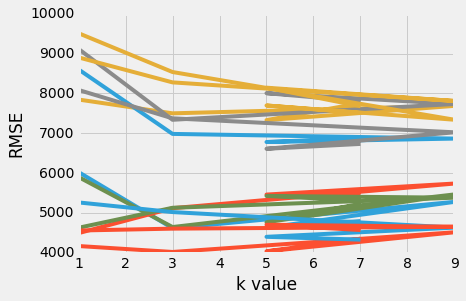

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.available
style.use('fivethirtyeight')

for k,value in k_rmse_results.items():
    x = list(value.keys())
    y = list(value.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

In [15]:
#calculate the average rmse value for each feature
avg_rmse_features={}
for k,v in k_rmse_results.items():
    avg_rmse=np.mean(list(v.values()))
    avg_rmse_features[k]=avg_rmse
series_avg_rmse = pd.Series(avg_rmse_features)
sorted_avg_rmse = series_avg_rmse.sort_values()
print(series_avg_rmse)

sorted_features = sorted_avg_rmse.index

bore                 7222.472445
city-mpg             5202.409003
compression-rate     7166.073599
curb-weight          4730.075815
height               8163.346266
highway-mpg          5069.469256
horsepower           4219.377860
length               5176.394904
normalized-losses    7624.407151
peak-rpm             8119.365233
stroke               8000.240467
wheel-base           5252.392462
width                4618.910560
dtype: float64


In [16]:
sorted_features

Index(['horsepower', 'width', 'curb-weight', 'highway-mpg', 'length',
       'city-mpg', 'wheel-base', 'compression-rate', 'bore',
       'normalized-losses', 'stroke', 'peak-rpm', 'height'],
      dtype='object')

#### Multivariate Model

In [26]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    # Randomize order of rows in data frame.
    shuffled_index=np.random.permutation(df.index)
    random_df= df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    split_data = int(len(random_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set
    train_df=random_df.iloc[0:split_data]
    test_df=random_df.iloc[split_data:]

    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        knn=KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])
        
        predict_labels=knn.predict(test_df[train_cols])
        
        mse=mean_squared_error(test_df[target_col],predict_labels)
        rmse = np.sqrt(mse)
        k_rmses[k]= rmse 
    return k_rmses
k_rmse_results = {}

for best_feature in range(2,6):
    k_rmse_results['{} best features'.format(best_feature)]=knn_train_test(
    sorted_features[:best_feature], 
    'price', 
    numeric_cars
    )
k_rmse_results

{'2 best features': {5: 3589.3132622073304},
 '3 best features': {5: 3305.9401397969677},
 '4 best features': {5: 3358.6915801682458},
 '5 best features': {5: 3665.546673045813}}

   #### Hyperparameter Tuning

In [27]:

def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

for nr_best_feats in range(2,6):
    k_rmse_results['{} best features'.format(nr_best_feats)] = knn_train_test(
        sorted_features[:nr_best_feats],
        'price',
        numeric_cars
    )

k_rmse_results

{'2 best features': {1: 4061.9613050304106,
  2: 3497.49936199118,
  3: 3402.8692636542114,
  4: 3587.0044198356923,
  5: 3589.3132622073304,
  6: 3680.062981095498,
  7: 3756.92796407086,
  8: 3937.770418264052,
  9: 4078.3485919700097,
  10: 4163.828373808731,
  11: 4297.135962941241,
  12: 4370.753019740529,
  13: 4500.462028689254,
  14: 4604.156707686779,
  15: 4595.345097101211,
  16: 4605.433669910023,
  17: 4611.2845838376215,
  18: 4598.88218482117,
  19: 4579.964891966457,
  20: 4653.966845712387,
  21: 4759.076059393234,
  22: 4807.805949321809,
  23: 4865.320887129985,
  24: 4910.715769042787},
 '3 best features': {1: 3013.0109985241875,
  2: 2813.285969825997,
  3: 3171.585284478674,
  4: 3182.3137417981943,
  5: 3305.9401397969677,
  6: 3522.506848900376,
  7: 3774.3772094554106,
  8: 3978.969124021116,
  9: 3992.923680588881,
  10: 4076.2381473803043,
  11: 4156.388331131807,
  12: 4201.10713385948,
  13: 4303.62676861325,
  14: 4359.693296989702,
  15: 4371.771103372868

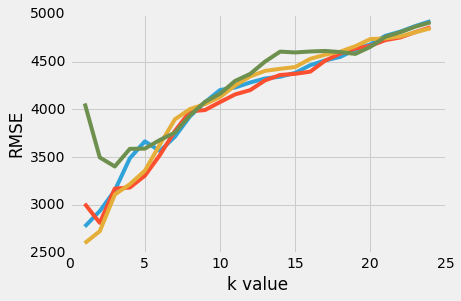

In [28]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

Conclusions:
k values less than 5 or nearest neighbors provides optimal values for predictions

#### k-fold cross validation

K-fold cross-validation includes:
Splitting the full data set into k equal length partitions:
- Selecting k-1 partitions as the training set.
- Selecting the remaining partition as the test set.
- Training the model on the training set.
- Using the trained model to predict labels on the test fold.
- Computing the test fold's error metric.
- Repeating all of the above steps k-1 times, until each partition has been used as the test set for an iteration.
- Calculating the mean of the k error values.

5 fold cross-validation

In [20]:
from sklearn.model_selection import cross_val_score, KFold
def k_fold_single_col(train_col,target_col,df):
    num_folds = [1,3,5,7,9]
    kf= KFold(5, shuffle=True, random_state=1)
    model=KNeighborsRegressor()
    mses = cross_val_score(model,df[[train_col]], df[target_col],scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.abs(mses))
    avg_rmses = np.mean(rmses)
    return avg_rmses

rmse_feature_value  = {}
train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_val= k_fold_single_col(col,'price', numeric_cars)
    rmse_feature_value[col] = rmse_val

print(rmse_feature_value)    
kfold_single_series =pd.Series(rmse_feature_value)
kfold_single_series.sort_values()

{'highway-mpg': 4110.515600828827, 'horsepower': 3728.5853126707866, 'normalized-losses': 7088.257745197118, 'city-mpg': 4412.774186566654, 'stroke': 7077.674277910615, 'bore': 6840.959167522199, 'wheel-base': 6047.925792509784, 'height': 7602.563324187031, 'length': 5674.682462899403, 'compression-rate': 6388.3385624919465, 'curb-weight': 4310.7102771908085, 'width': 4198.202899280919, 'peak-rpm': 7522.469960701387}


horsepower           3728.585313
highway-mpg          4110.515601
width                4198.202899
curb-weight          4310.710277
city-mpg             4412.774187
length               5674.682463
wheel-base           6047.925793
compression-rate     6388.338562
bore                 6840.959168
stroke               7077.674278
normalized-losses    7088.257745
peak-rpm             7522.469961
height               7602.563324
dtype: float64

#### 5 folds and vary the hyperparamater k for k in [1,3,5,7,9]

In [33]:
def k_fold_single_cols(train_col,target_col,df):
    num_folds = [1,3,5,7,9]
    kf= KFold(5, shuffle=True, random_state=1)
    k_val={}
    for k in num_folds:
        model=KNeighborsRegressor(n_neighbors=k)
        mses = cross_val_score(model,df[[train_col]], df[target_col],scoring="neg_mean_squared_error", cv=kf)
        rmses = np.sqrt(np.abs(mses))
        avg_rmses = np.mean(rmses)
        k_val[k]= avg_rmses
    return k_val

rmse_feature_value  = {}
train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_val= k_fold_single_cols(col,'price', numeric_cars)
    rmse_feature_value[col] = rmse_val

print(rmse_feature_value)    


{'highway-mpg': {1: 5732.722405327001, 3: 4595.888177019093, 9: 4339.428031944607, 5: 4110.515600828827, 7: 4305.136902089172}, 'horsepower': {1: 4043.930895951472, 3: 3656.4903110777886, 9: 3845.009302359436, 5: 3728.5853126707866, 7: 3693.7180599659746}, 'normalized-losses': {1: 8739.121756745079, 3: 6951.353120455105, 9: 7721.082283472022, 5: 7088.257745197118, 7: 7564.31221647824}, 'city-mpg': {1: 5692.590421689251, 3: 4476.886228945198, 9: 4414.779457098011, 5: 4412.774186566654, 7: 4398.665292948103}, 'stroke': {1: 8229.487873859067, 3: 7170.581358116106, 9: 7426.554518649462, 5: 7077.674277910615, 7: 7210.771070204528}, 'bore': {1: 8704.760007703995, 3: 6631.371348737125, 9: 6593.84093897876, 5: 6840.959167522199, 7: 6848.317962683868}, 'wheel-base': {1: 4243.639928884716, 3: 5071.662902314459, 9: 6182.245736470325, 5: 6047.925792509784, 7: 6139.038807530529}, 'height': {1: 9267.972331603416, 3: 7577.75231284287, 9: 7595.696899292711, 5: 7602.563324187031, 7: 7550.773416526457},

In [34]:
new_dict = dict()
for k,v in rmse_feature_value.items():
    avg_rmse = np.mean(list(v.values()))
    new_dict[k] = avg_rmse
kfold_single_series =pd.Series(new_dict).sort_values()
print(kfold_single_series)
all_features = kfold_single_series.index
all_features

horsepower           3793.546776
width                4411.319744
curb-weight          4427.955978
highway-mpg          4616.738223
city-mpg             4679.139117
length               5452.900293
wheel-base           5536.902634
compression-rate     6733.555237
bore                 7123.849885
stroke               7423.013820
normalized-losses    7612.825424
peak-rpm             7720.417907
height               7918.951657
dtype: float64


Index(['horsepower', 'width', 'curb-weight', 'highway-mpg', 'city-mpg',
       'length', 'wheel-base', 'compression-rate', 'bore', 'stroke',
       'normalized-losses', 'peak-rpm', 'height'],
      dtype='object')

Both holdout validation technique and  K-Fold Cross Validation are listing the same first 4 best features.The relevant features are :
- horsepower         
- width                
- curb-weight